In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics 
from sklearn.feature_extraction import text
import re

In [2]:
yelp = pd.read_csv('./data/yelp.csv')
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [3]:
# 讀取csv檔僅保留"text"、"stars"兩個欄位
data = yelp[['text','stars']]
# 將stars欄位內值大於等於4的轉成1，其餘轉成0
data.loc[data['stars']<4 , 'stars'] = 0 
data.loc[data['stars']>=4 , 'stars'] = 1 
data['text'] = data['text'].str.lower()
display(data)
# 1: positive, 0: negative

,text,stars
0,my wife took me here on my birthday for breakf...,1
1,i have no idea why some people give bad review...,1
2,love the gyro plate. rice is so good and i als...,1
3,"rosie, dakota, and i love chaparral dog park!!...",1
4,general manager scott petello is a good egg!!!...,1
...,...,...
9995,first visit...had lunch here today - used my g...,0
9996,should be called house of deliciousness!\n\ni ...,1
9997,i recently visited olive and ivy for business ...,1
9998,my nephew just moved to scottsdale recently so...,0


In [4]:
stop_list = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves',
        'he','him','his','himself','she','her','hers','herself,it','its','itself','they','them','their,theirs',
        'themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were',
        'be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but',
        'if','or','because','as','until','while','of','at','by','for','with','about','against','between',
        'into','through','during','before','after','above','below','to','from','up','down','in','out','on',
        'off','over','under','again','further','then','once','here','there','when','where','why','how','all',
        'any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same',
        'so','than','too','very','s','t','can','will','just','don','should','now','\n']

data['text_split'] = ''

from gensim.parsing.preprocessing import remove_stopwords

for i in range(len(data)):
    # 去除停頓詞stop words
    data.text.iloc[i] = remove_stopwords(data.text.iloc[i])
    
    # 將text欄位內的文字利用分割符號切割
    split = re.split(';|,|\s|,\s|\.|\*|\n',data.iloc[i]['text'])
    split_new = [word for word in split if word.isalpha()]
    data.text_split.iloc[i] = split_new[:100]
data['processed'] = data['text_split'].apply(lambda x: " ".join(x) )
data

,text,stars,text_split,processed
0,wife took birthday breakfast excellent. weathe...,1,"[wife, took, birthday, breakfast, excellent, w...",wife took birthday breakfast excellent weather...
1,"idea people bad reviews place. goes you, every...",1,"[idea, people, bad, reviews, place, goes, you,...",idea people bad reviews place goes you everyon...
2,love gyro plate. rice good dig candy selection :),1,"[love, gyro, plate, rice, good, dig, candy, se...",love gyro plate rice good dig candy selection
3,"rosie, dakota, love chaparral dog park!!! it's...",1,"[rosie, dakota, love, chaparral, dog, convenie...",rosie dakota love chaparral dog convenient sur...
4,general manager scott petello good egg!!! deta...,1,"[general, manager, scott, petello, good, detai...",general manager scott petello good detail let ...
...,...,...,...,...
9995,visit...had lunch today - groupon. ordered bru...,0,"[visit, had, lunch, today, groupon, ordered, b...",visit had lunch today groupon ordered bruschet...
9996,"called house deliciousness! item, item, blah b...",1,"[called, house, item, item, blah, blah, blah, ...",called house item item blah blah blah dont waz...
9997,"recently visited olive ivy business week, 3 vi...",1,"[recently, visited, olive, ivy, business, week...",recently visited olive ivy business week visit...
9998,nephew moved scottsdale recently bunch friends...,0,"[nephew, moved, scottsdale, recently, bunch, f...",nephew moved scottsdale recently bunch friends...


In [5]:
words = list(data.text_split)
display(data.text_split)

0       [wife, took, birthday, breakfast, excellent, w...
1       [idea, people, bad, reviews, place, goes, you,...
2       [love, gyro, plate, rice, good, dig, candy, se...
3       [rosie, dakota, love, chaparral, dog, convenie...
4       [general, manager, scott, petello, good, detai...
                              ...                        
9995    [visit, had, lunch, today, groupon, ordered, b...
9996    [called, house, item, item, blah, blah, blah, ...
9997    [recently, visited, olive, ivy, business, week...
9998    [nephew, moved, scottsdale, recently, bunch, f...
9999    [locations, star, average, think, arizona, fan...
Name: text_split, Length: 10000, dtype: object

In [6]:
word_set = set()
for i in range(len(words)):
    for j in range(len(words[i])):
        word_set.add(words[i][j])
                     
print(len(word_set))

25074


In [7]:
# 做token
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
token = Tokenizer(num_words=25074)
token.fit_on_texts(words)
words = token.texts_to_sequences(words)
words = sequence.pad_sequences(words, maxlen=100)
token.word_index

Using TensorFlow backend.


{'place': 1,
 'good': 2,
 'food': 3,
 'great': 4,
 'like': 5,
 'time': 6,
 'service': 7,
 'love': 8,
 'nice': 9,
 'little': 10,
 'it': 11,
 'best': 12,
 'pretty': 13,
 'got': 14,
 'ordered': 15,
 'chicken': 16,
 'restaurant': 17,
 'try': 18,
 'menu': 19,
 'went': 20,
 'friendly': 21,
 'people': 22,
 'know': 23,
 'order': 24,
 'bar': 25,
 'staff': 26,
 'better': 27,
 'think': 28,
 'night': 29,
 'going': 30,
 'pizza': 31,
 'way': 32,
 'lunch': 33,
 'came': 34,
 'cheese': 35,
 'right': 36,
 'salad': 37,
 'want': 38,
 'new': 39,
 'fresh': 40,
 'come': 41,
 'delicious': 42,
 'here': 43,
 'eat': 44,
 'happy': 45,
 'day': 46,
 'sauce': 47,
 'definitely': 48,
 'times': 49,
 'wait': 50,
 'sure': 51,
 'experience': 52,
 'bit': 53,
 'area': 54,
 'location': 55,
 'bad': 56,
 'said': 57,
 'lot': 58,
 'table': 59,
 'dinner': 60,
 'well': 61,
 'amazing': 62,
 'meal': 63,
 'thing': 64,
 'hour': 65,
 'small': 66,
 'favorite': 67,
 'prices': 68,
 'big': 69,
 'phoenix': 70,
 'me': 71,
 'there': 72,
 'san

In [8]:
words[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   283,   103,   526,   105,
         106,  1094,   141,   404,   151,  5460,  2091,  1508,  1744,
         229,   106,     3,   380,   415,   351,   323,   196,     5,
           1,  3575,    13,   415,  1361,    27,  2196,  1714,  2332,
        1694,   605,    12,   333,    13,    51,   197,   416,  1160,
        2333,    40,    24,    11,    62,    19,   377,   106,   305,
        2144,  3200,   430,  1475,  3011,    80,    42,    34,   606,
       11093,   107,    62,   316,    63,   947,    12,   333,   559,
          50])

In [9]:
# 切分訓練集和測試集
x_train = words[:int(0.8*len(words))]
x_test = words[int(0.8*len(words)):]

y_train = data['stars'].iloc[:int(0.8*len(words))]
y_test = data['stars'].iloc[int(0.8*len(words)):]

np.shape(x_train)
# display(x_test)
# display(y_train)
# display(y_test)

# x_train = np.array(x_train).reshape((8000, 300, 1)) 
# x_test = np.array(x_test).reshape((2000, 300, 1))

# y_train = np.array(y_train)
# y_train = np.expand_dims(y_train, axis=1)
# y_test = np.array(y_test)
# y_test = np.expand_dims(y_test, axis=1)

(8000, 100)

In [10]:
from keras.models import Sequential

# 建立CNN模型
from keras.layers import Conv1D  # Convolution Operation
from keras.layers import MaxPooling1D # Pooling
from keras.layers import Embedding,Flatten, Dense, Dropout
from keras.layers import Reshape

model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=25074+1, output_dim=32,input_length=100))
model_cnn.add(Conv1D(filters=32, kernel_size=15, activation='relu'))
model_cnn.add(Dropout(0.7))
model_cnn.add(MaxPooling1D(pool_size=4))
model_cnn.add(Flatten())
model_cnn.add(Dense(output_dim = 128, activation = 'relu'))
model_cnn.add(Dropout(0.7))
model_cnn.add(Dense(output_dim = 64, activation = 'relu'))
model_cnn.add(Dropout(0.7))
model_cnn.add(Dense(output_dim = 1, activation = 'sigmoid'))
print(model_cnn.summary())
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_cnn = model_cnn.fit(x_train, y_train, batch_size=128, epochs=10)

# classes = model.predict(x_test, batch_size=128)
acc_cnn = model_cnn.evaluate(x_test, y_test, batch_size=128)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 32)           802400    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 86, 32)            15392     
_________________________________________________________________
dropout_1 (Dropout)          (None, 86, 32)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 21, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 672)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               86144     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)             

In [11]:
acc_cnn

[0.8718065347671509, 0.7919999957084656]

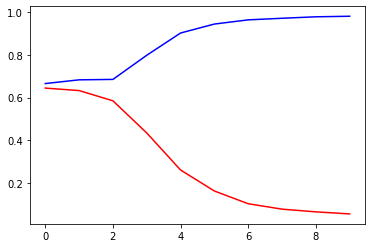

In [12]:
# 對訓練過程的準確度繪圖
plt.plot(history_cnn.history['accuracy'], 'b', label='acc')

# 對訓練過程的損失函數繪圖
plt.plot(history_cnn.history['loss'], 'r', label='loss')

In [13]:
# 建立LSTM模型
from keras.layers.recurrent import LSTM

model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=25074+1, output_dim=32,input_length=100))
model_lstm.add(LSTM(32))
model_lstm.add(Dense(output_dim = 128, activation = 'relu'))
model_lstm.add(Dropout(0.7))
model_lstm.add(Dense(output_dim = 64, activation = 'relu'))
model_lstm.add(Dropout(0.7))
model_lstm.add(Dense(output_dim = 1, activation = 'sigmoid'))
print(model_lstm.summary())
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history_lstm = model_lstm.fit(x_train, y_train, batch_size=128, epochs=10)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 32)           802400    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4224      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

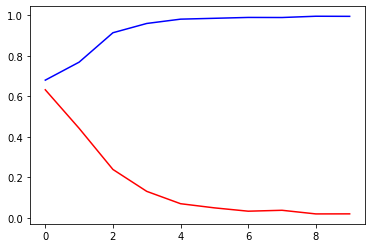

In [14]:
# 對訓練過程的準確度繪圖
plt.plot(history_lstm.history['accuracy'], 'b', label='acc')

# 對訓練過程的損失函數繪圖
plt.plot(history_lstm.history['loss'], 'r', label='loss')